<a href="https://colab.research.google.com/github/Moonba/fastai/blob/main/01_intro_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.2MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 1.1MB 44.4MB/s 
     |████████████████████████████████| 194kB 45.0MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |████████████████████████████████| 2.6MB 44.7MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [4]:
# CLICK ME
from fastai.vision.all import *  # Not recommended to import * but fastai api is optimized for this
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()  # if first letter of the filename is an upper case, it's a cat
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,  # valid_pct = validation percentage = 20%
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)  # used architecture: ResNet34
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.176265,0.021175,0.007442,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.058841,0.022902,0.005413,00:57


In [5]:
untar_data  # Downloads a dataset and decompress it  

<function fastai.data.external.untar_data>

In [6]:
doc(ImageDataLoaders.from_name_func)

### Questionnaire

1. Do you need these for deep learning?

   - Lots of math: F
   - Lots of data: T
   - Lots of expensive computers: F
   - A PhD: F
   
1. Name five areas where deep learning is now the best in the world:<br />Recommender Systems / Computer Vision / NLP / Robotics / Image generation /  Strategy Games (Go / Chess ..)

1. What was the name of the first device that was based on the principle of the artificial neuron?<br />A mathematical model of an artificial neuron in 1943
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?<br />Processing unit -> state of activation -> output function -> pattern of connectivity -> propogation rule -> activation rule -> learning rule -> environment

1. What were the two theoretical misunderstandings that held back the field of neural networks?<br />Most models built with only a second layer of neurons.<br />A misunderstanding of the theoretical issues  

1. What is a GPU?<br />Graphical Processing Unit

1. Open a notebook and execute a cell containing: `1+1`. What happens?

In [7]:
1+1

2

### Miaw?

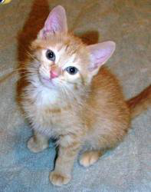

In [8]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [16]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [17]:
img = PILImage.create(uploader.data[0])

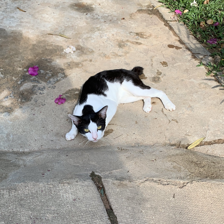

In [18]:
img.resize((224,224))

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
# uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [19]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000073


### What Is Machine Learning?
1. Why is it hard to use a traditional computer program to recognize images in a photo?<br />Because it's exasperating to write down all the exact detailed steps with for loops and conditions.

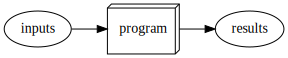

In [20]:
gv('''program[shape=box3d width=1 height=0.7]
inputs->program->results''')

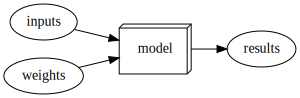

In [21]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model''')


1. What did Samuel mean by "weight assignment"?<br />In the game example, enumerate all the possible ways of playing checkers and evaluating the performance of each way (leads to a win/loss of the game). 
1. What term do we normally use in deep learning for what Samuel called "weights"?<br />parameters
1. Draw a picture that summarizes Samuel's view of a machine learning model.

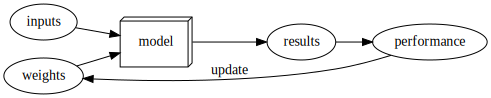

In [22]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7]
inputs->model->results; weights->model; results->performance
performance->weights[constraint=false label=update]''')

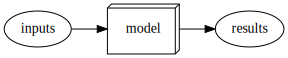

In [23]:
gv('''model[shape=box3d width=1 height=0.7]
inputs->model->results''')

### A Bit of Deep Learning Jargon

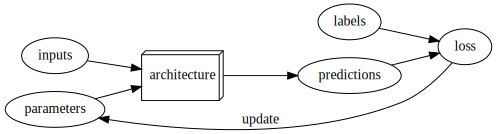

In [24]:
gv('''ordering=in
model[shape=box3d width=1 height=0.7 label=architecture]
inputs->model->predictions; parameters->model; labels->loss; predictions->loss
loss->parameters[constraint=false label=update]''')

### Limitations Inherent To Machine Learning

From this picture we can now see some fundamental things about training a deep learning model:

- A model cannot be created without data.
- A model can only learn to operate on the patterns seen in the input data used to train it.
- This learning approach only creates *predictions*, not recommended *actions*.
- It's not enough to just have examples of input data; we need *labels* for that data too (e.g., pictures of dogs and cats aren't enough to train a model; we need a label for each one, saying which ones are dogs, and which are cats).

### Questionnaire

1. Why is it hard to understand why a deep learning model makes a particular prediction?<br />In the case of a strategic game like chess, we can think of coding different game scenarios based of the game rules. But in the case of images classification problem, it will be more complicated to think of a program that does that. 
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?<br />universal approximation theorem
1. What do you need in order to train a model?<br />labeled inout data
1. How could a feedback loop impact the rollout of a predictive policing model?<br />If the data is biased, the model becomes biased.

1. Do we always have to use 224×224-pixel images with the cat recognition model?<br />The used network ResNet34 (34 layers) can take the input image having height, width as multiples of 32 and 3 as channel width.
(32 * 7 = 224).<br />It's important to have images of same size (train,test) for the performance ppf the model. Size depends on the architecture of the used neural network.

1. What is the difference between classification and regression?<br />Classification problems when we predict a category or class, which means predicting from a number of discrete possibilities. There is binary classification (0,1) or multi-class problems (like on MNIST).
Regression models predicts one or more numeric quantities such as GDP or temperature.

1. What is a validation set? What is a test set? Why do we need them?<br />
Validation set is a portion of the train sent on which we will measure accuracy to prevent our model from overfitting. The test set to measure the performance of our model on unseen data.

1. What will fastai do if you don't provide a validation set?
<br />valid_pct = 0.2 by default

1. Can we always use a random sample for a validation set? Why or why not?<br />
Depending on the problem:
For time predictions, it makes more sense to cut the available data of the last period of time, because we weant to predict the behaviour in the future.
We can pick up random point if it's unrelated to time like in the dog/cat classification as long as our data is diversified. 
For example, if the first 100 images are black cats , following are 100 brown, following 100 grey... then we should shuffle and pick up to make sure we get all the sub-categories in our train/validation sets. 

1. What is overfitting? Provide an example.<br />
When your model over-memorizes the trainset that it fails on actual unseen test set. The model should learn the patterns in the picture not the whole picture. 

1. What is a metric? How does it differ from "loss"?<br />
A metric is a function that measures the quality of the model's predictions using the validation set, and it will be printed at the end of each epoch.
<br />Classification Models metrics: 
<br />Accuracy, AUC, F1, cross_entropy ...
<br />Regression models metrics:
<br />RMSE, MAE, R squared...
<br /><br />Loss is the function to measure the performance of the update of the parameters. A slight change in parameters may not affect teh metric or the resulted predictions but we can detect its impact by the loss function.

1. How can pretrained models help?
<br />Pretrained models like VGG16 helps us gain the training time

1. What is the "head" of a model?
<br />"When using a pretrained model, cnn_learner will remove the last layer, since that is always specifically customized to the original training task (i.e. ImageNet dataset classification), and replace it with one or more new layers with randomized weights, of an appropriate size for the dataset you are working with. This last part of the model is known as the head."<br />Every model might be thought of as a backbone plus a head, and if you pre-train backbone and put a random head, you can fine tune it and it is a good idea.
1. What kinds of features do the early layers of a CNN find? How about the later layers?
First features usually like areas with uni-color or gradient colored area with 2 colors or basic geometric shapes (like a diagonal).
Later on, it can detect objects made with the found complicated geometric shapes (like a car's wheel) and completed scenes (like sunset)
1. Are image models only useful for photos?
<br />No. 

1. What is an "architecture"?
<br />The template of the model, a mathematical function that we're passing the input data and the parameters. 
=> The model is an architecture with parameters.

## Deep Learning Is Not Just for Image Classification

Transfer Learning: Is using a pretrained model for a task different to what it trained for.

Fine tuning is a Transfer Learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

For more pre-trained models: check https://modelzoo.co/

In [25]:
path = untar_data(URLs.CAMVID_TINY)
# Image segmentation (objects detection/coloring)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8) 

epoch,train_loss,valid_loss,time
0,2.842002,2.321041,00:01


epoch,train_loss,valid_loss,time
0,1.864263,1.527838,00:01
1,1.763992,1.411103,00:01
2,1.600071,1.147159,00:01
3,1.446336,1.036015,00:01
4,1.298929,0.896588,00:01
5,1.166297,0.828705,00:01
6,1.057920,0.823724,00:01
7,0.973900,0.807845,00:01


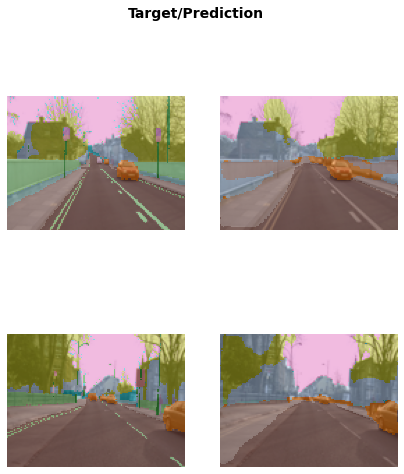

In [26]:
learn.show_results(max_n=6, figsize=(7,8))

1. What is segmentation?
<br />Area division of parts of an image based on the identified object like in the images above.

In [27]:
from fastai.text.all import *
# IMDB Reviews datase
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.594728,0.406467,0.819400,03:54


epoch,train_loss,valid_loss,accuracy,time
0,0.332044,0.264929,0.894880,07:34
1,0.256746,0.201915,0.920880,07:34
2,0.205838,0.188569,0.927960,07:35
3,0.159236,0.187476,0.928600,07:35


P.S: If you hit a "CUDA out of memory error" after running this cell, click on the menu Kernel, then restart. Instead of executing the cell above, copy and paste the following code in it:

```
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test', bs=32)
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
```

This reduces the batch size to 32 (we will explain this later). If you keep hitting the same error, change 32 to 16.

Convolutional neural networks are memory-intensive especially for training. If you’re running out of memory you can try to reduce your memory usage by:
*   Reducing your batch size.
*   if you only want to do inference, turning off all gradient computation (for example, in pytorch you call model.eval() or manually set requires_grad=False to all Variables).
*   Reducing the input image resolution.
*   Reducing the number of layers in your network or doing some downsampling very early on (but both of these will impact performance).

In [28]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0014, 0.9986]))

### Sidebar: The Order Matters

### End sidebar

In [29]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [30]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.354529,0.371344,0.817721,00:05
1,0.352858,0.357660,0.835534,00:05
2,0.343682,0.354433,0.837070,00:05


In [31]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
# Collaborative filtering
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.514027,1.414746,00:00


epoch,train_loss,valid_loss,time
0,1.352839,1.353742,00:00
1,1.238354,1.166672,00:00
2,1.017358,0.865734,00:00
3,0.797716,0.733449,00:00
4,0.685541,0.704870,00:00
5,0.644042,0.696058,00:00
6,0.625612,0.694088,00:00
7,0.615094,0.691392,00:00
8,0.613931,0.691198,00:00
9,0.609334,0.691074,00:00


In [32]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,19.0,97.0,3.0,4.052108
1,74.0,55.0,5.0,4.454032
2,85.0,40.0,3.0,3.510991
3,18.0,85.0,4.0,3.479806
4,26.0,45.0,4.0,4.505086
5,9.0,80.0,4.0,3.491925
6,100.0,12.0,1.0,3.067401
7,41.0,84.0,3.0,3.963876
8,98.0,23.0,4.5,3.070635


## Questionnaire

1. What is `y_range` used for? When do we need it?<br/>"This model is predicting movie ratings on a scale of 0.5 to 5.0 to within around 0.6 average error. Since we're predicting a continuous number, rather than a category, we have to tell fastai what range our target has, using the y_range parameter."
1. What are "hyperparameters"?
<br />"they are parameters about parameters, since they are the higher-level choices that govern the meaning of the weight parameters."<br />The model parameters like learning rate/ epochs that we can modify to improve our model.
Epoch is 1 cycle of checking each image in the dataset once

1. What's the best way to avoid failures when using AI in an organization?
*   Start with a baseline model.
*   Hide a portion of the organization's data to have a final set for the trained model.
<br/><br/>To understand the data we feed the model. For example, in a loan credit system, a model was fed all columns including a column that has loan number. This loan number is only generated once a loan is approved. When testing the model, all cases were rejected. Because the model gave weight to a non null loan number. In this case, the loan number column should have been dropped from the set before the training.

### Further Research

Each chapter also has a "Further Research" section that poses questions that aren't fully answered in the text, or gives more advanced assignments. Answers to these questions aren't on the book's website; you'll need to do your own research!

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?<br />
CPUs are latency optimized while GPUs are bandwidth optimized.
The CPU is good at fetching small amounts of memory quickly (simple math) while the GPU is good at fetching large amounts of memory(for complicated math like matrix multiplication).
So the more memory your computational operations require, the more significant the advantage of GPUs over CPUs.
Think Ferrari vs Big Truck ;)
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.